In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
data = pd.read_csv('crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
data.shape

(2200, 8)

In [11]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [15]:
data.duplicated().sum()

0

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')
7


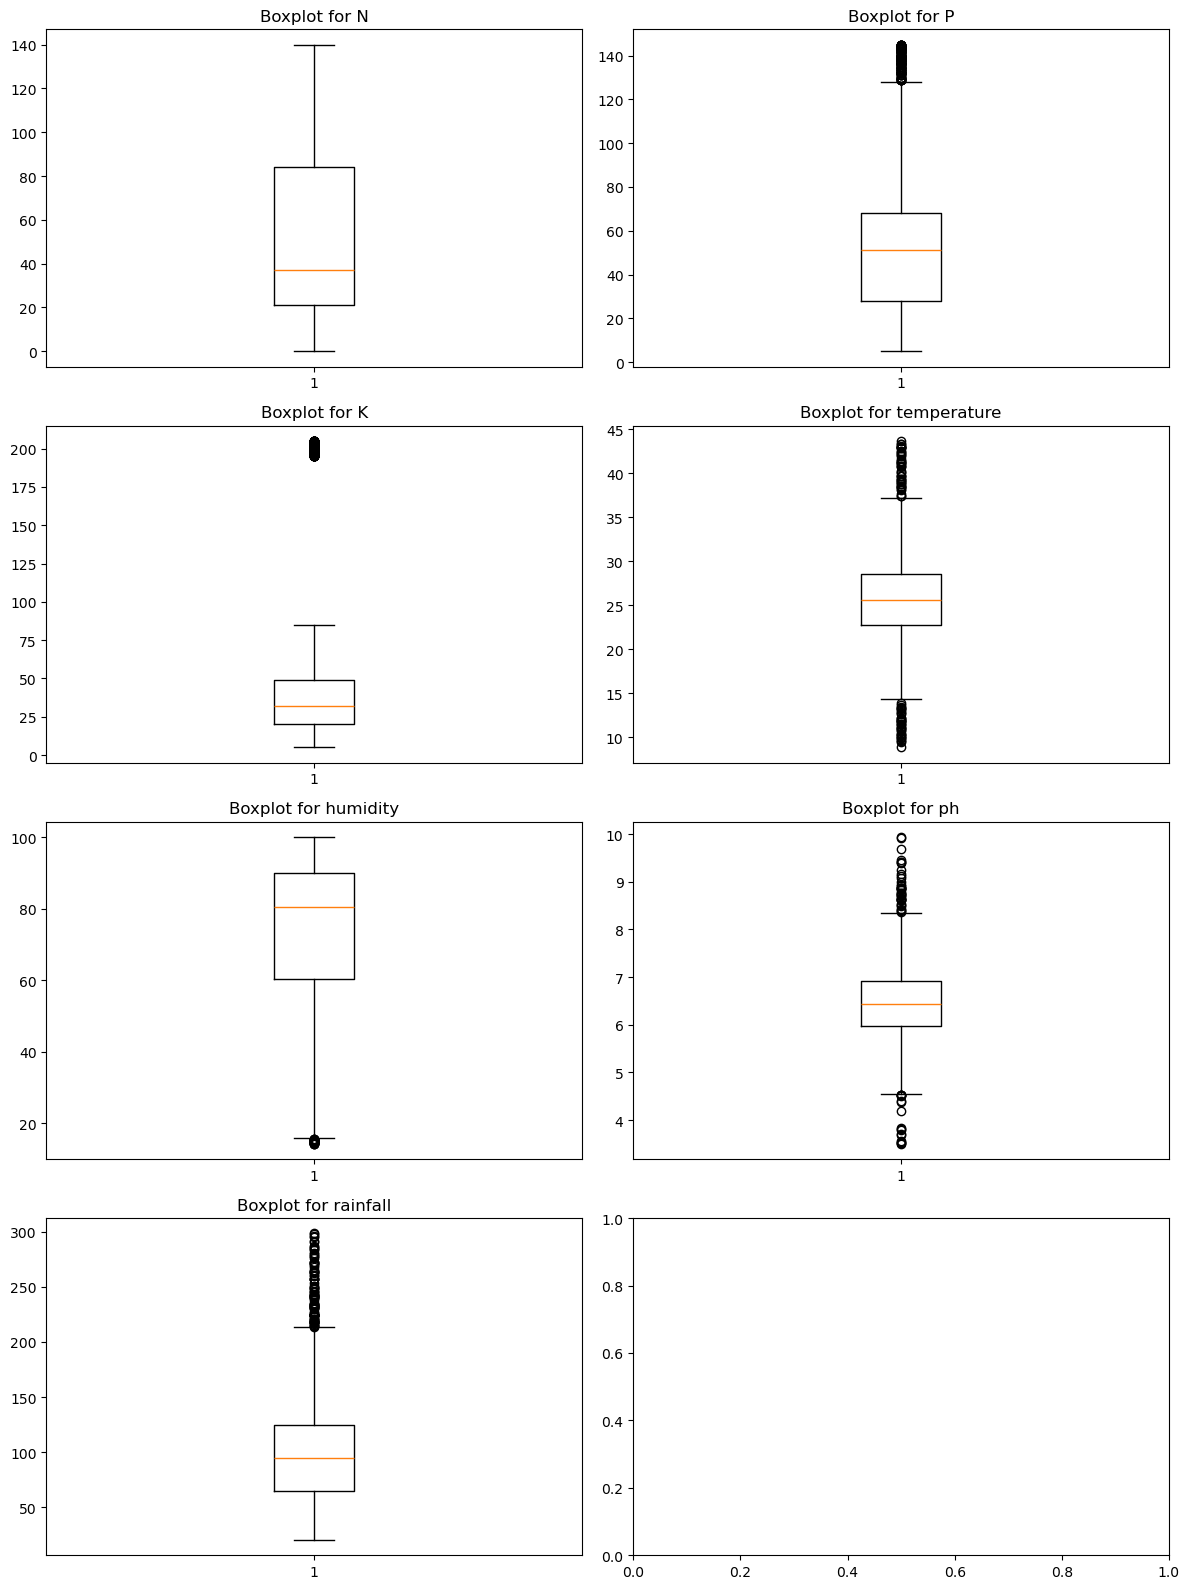

In [11]:
num_col = data.select_dtypes(include="number")
cols = num_col.columns
print(cols)
n = len(cols)
print(n)
fig, axs = plt.subplots(4, 2, figsize=(12, 16)) 
axs = axs.ravel()
for i in range(n):
    axs[i].boxplot(data[cols[i]].dropna())
    axs[i].set_title(f"Boxplot for {cols[i]}")
plt.tight_layout()
plt.show()


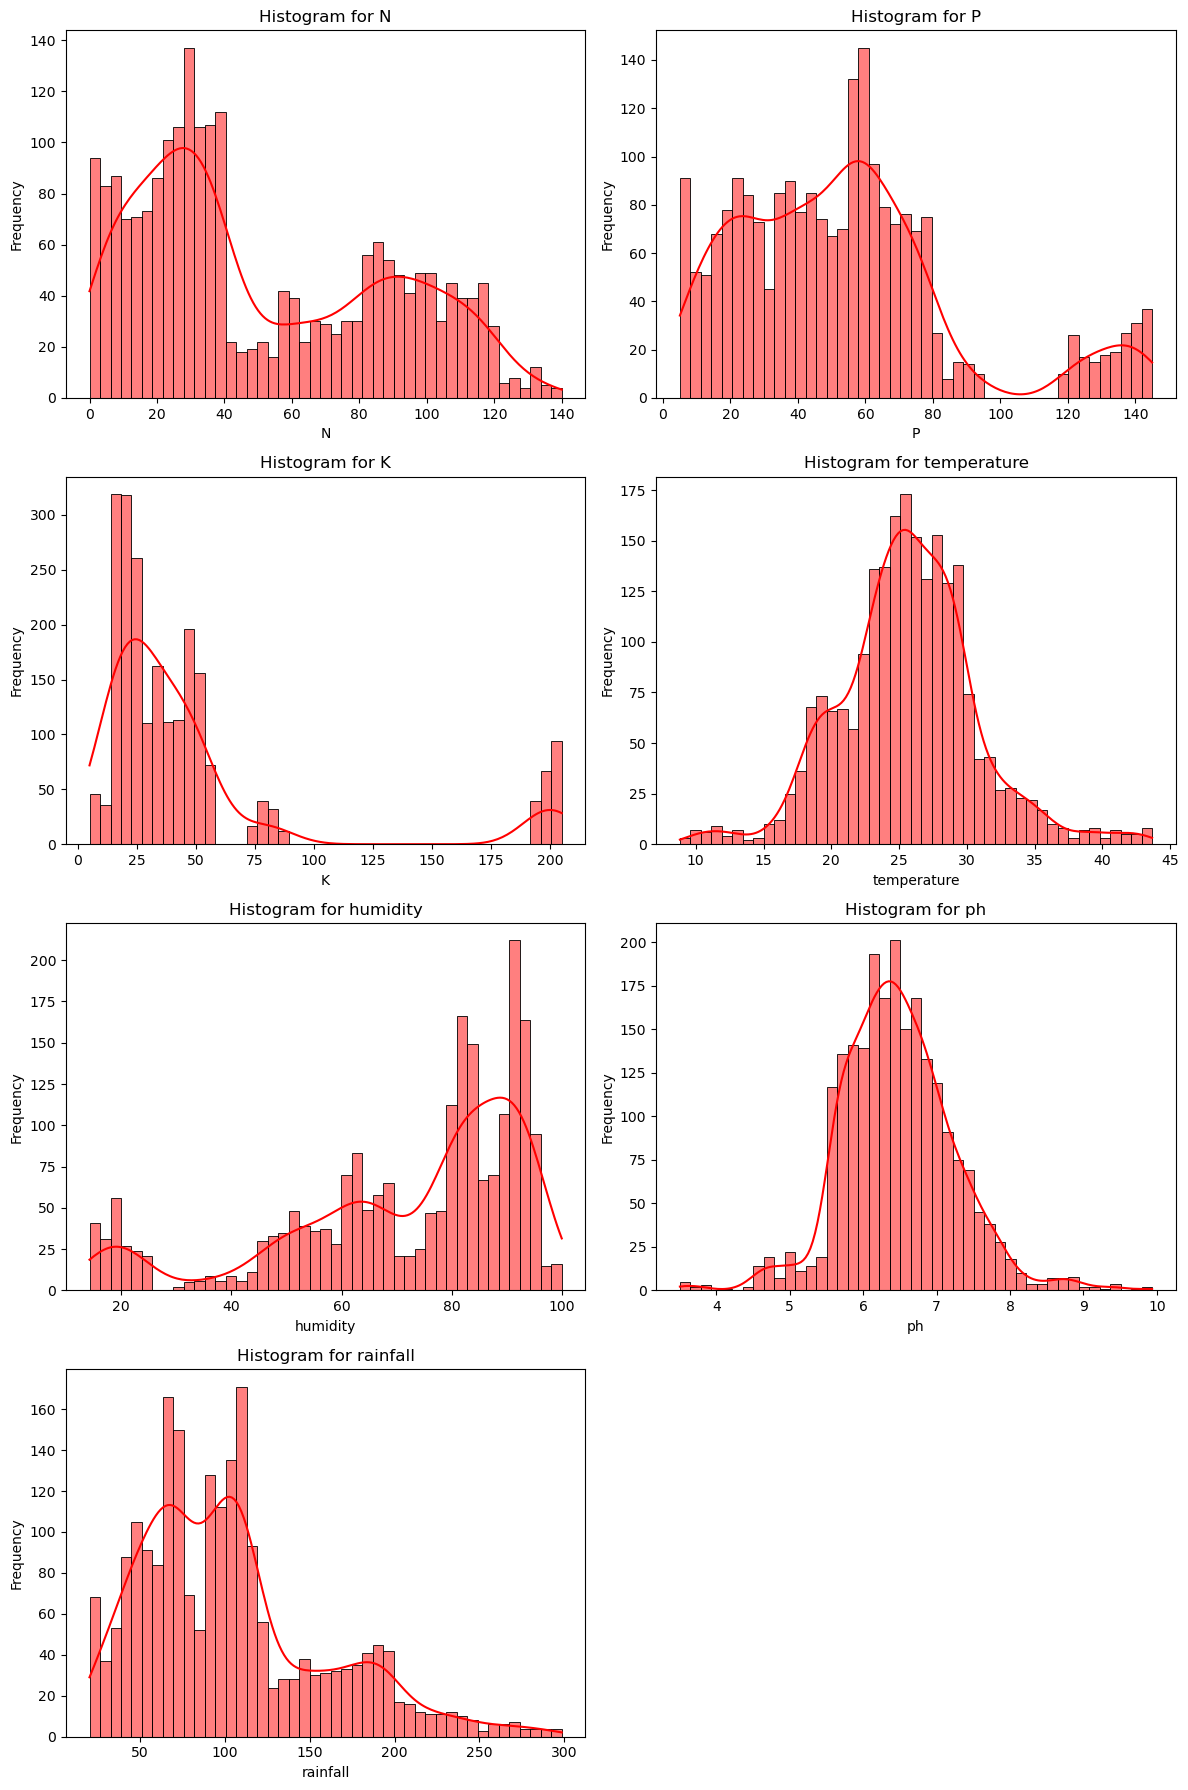

In [15]:
fig,axs=plt.subplots(4,2,figsize=(12,18))
axs=axs.ravel()
for i in range(n):
    sns.histplot(data[cols[i]], bins=45, kde=True, ax=axs[i], color="red")
    axs[i].set_title(f"Histogram for {cols[i]}")
    axs[i].set_ylabel("Frequency")
for j in range(n, len(axs)):
    fig.delaxes(axs[j])
plt.tight_layout()
plt.show()

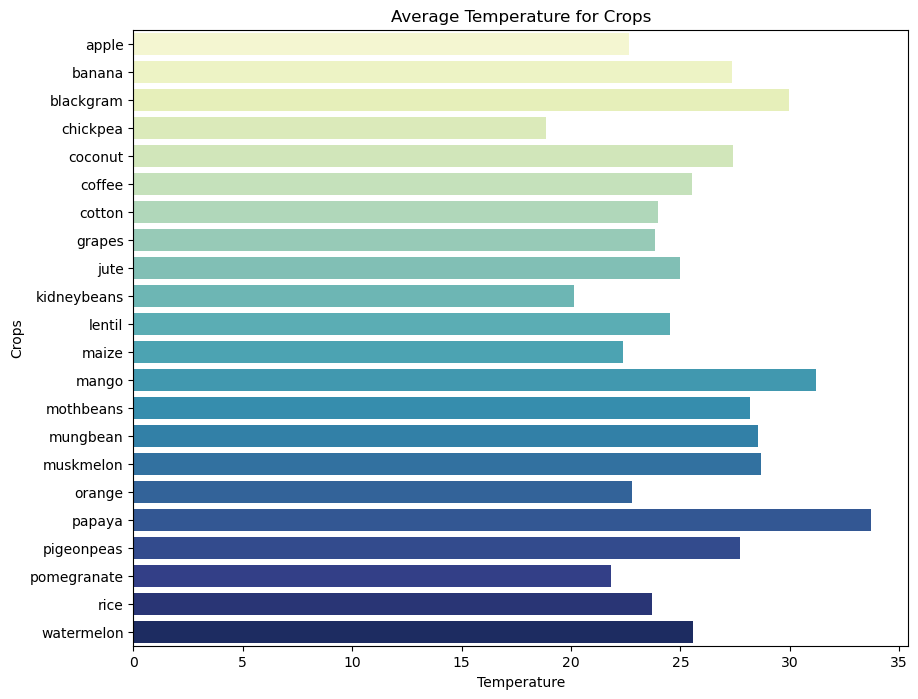

In [73]:
grouped_label_data=data.groupby("label")["temperature"].mean().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(y="label",hue = "label", x="temperature",data=grouped_label_data, palette="YlGnBu", legend=False)
plt.ylabel("Crops")
plt.title("Average Temperature for Crops")
plt.xlabel("Temperature")
plt.show()

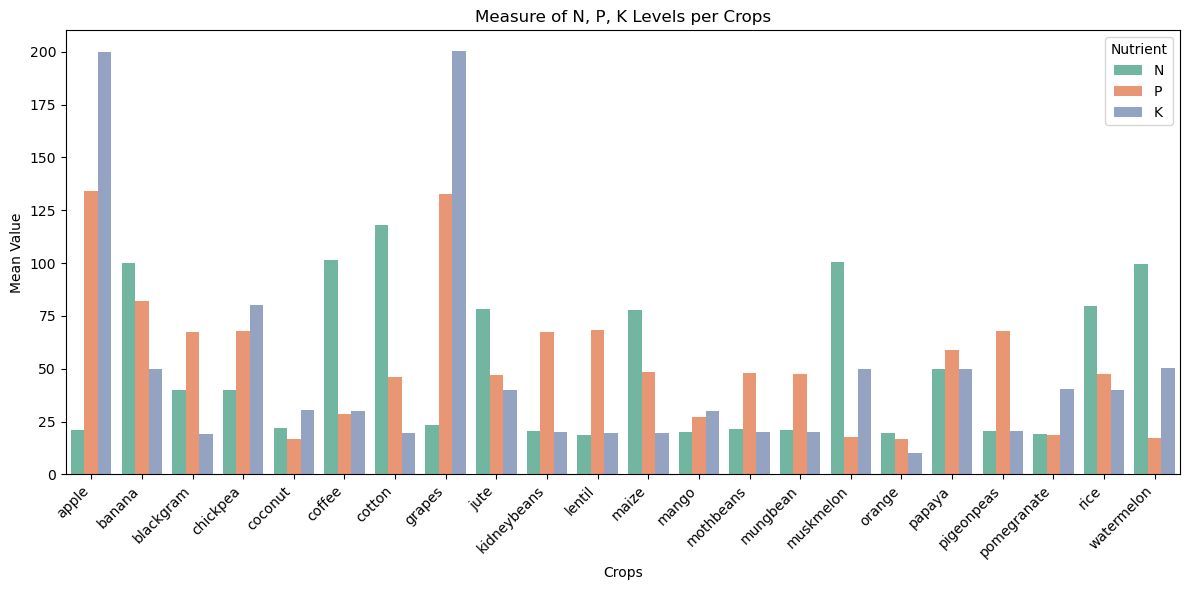

In [83]:
#Measure of N, P, K Levels per Crops

# Group and melt data
group_npk = data.groupby("label")[["N", "P", "K"]].mean().reset_index()
melted = group_npk.melt(id_vars="label", value_vars=["N", "P", "K"],
                        var_name="Nutrient", value_name="Mean Value")

# Plot
plt.figure(figsize=(12, 6))  # Wider for readability
sns.barplot(x="label", y="Mean Value", hue="Nutrient", data=melted, palette="Set2")
plt.title("Measure of N, P, K Levels per Crops")
plt.ylabel("Mean Value")
plt.xlabel("Crops")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
